# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
#!pip install palmerpenguins

from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, label_binarize
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from plotnine import *
import matplotlib.pyplot as plt



In [4]:

penguins = load_penguins()

#Fix concerns about the data
#Get rid of columns with mostly NaN values
good_cols = penguins.isna().sum() < 100
penguins = penguins.loc[:,good_cols]
#Drop other NAs
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [5]:
penguins['year'] = penguins['year'].astype('object')

# Select features and target
X = penguins.drop(columns=['species'])
y = penguins['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Create identifier for categorical and number columns
catCols = X.select_dtypes(include=['object']).columns
numCols = X.select_dtypes(include=['int64', 'float64']).columns

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [6]:
# kNN Model 1
# Preprocessing: OneHotEncoder for categorical variables and StandardScaler for numerical variables
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numCols),
        ('cat', OneHotEncoder(), catCols)
    ]
)

# Create a pipeline with preprocessing and logistic regression
knn_pipeline_1 = Pipeline(
    steps=[
        ('preprocessor', ct),
        ('classifier', KNeighborsClassifier(n_neighbors=3))
    ]
)

# Train the pipeline
knn_pipeline_1.fit(X, y)

knn1_y_pred_train = knn_pipeline_1.predict(X_train)
knn1_y_pred_test = knn_pipeline_1.predict(X_test)

#Accuracy score
knn1_training_accuracy = accuracy_score(y_train, knn1_y_pred_train)
print(f"kNN 1 Training Accuracy: {knn1_training_accuracy}")

#Confusion Matrix
knn1_cm = confusion_matrix(y_test, knn1_y_pred_test)
print(f"kNN 1 Confusion Matrix:\n {knn1_cm}")

#Classification report
knn1_cr = classification_report(y_test, knn1_y_pred_test)
print(f"kNN 1 Confusion Matrix:\n {knn1_cr}")

#AUC
prob = knn_pipeline_1.predict_proba(X_test)
knn1_roc_auc = roc_auc_score(y_test, prob, multi_class='ovr')
print(f"kNN 1 ROC / AUC:\n {knn1_roc_auc}")

kNN 1 Training Accuracy: 0.9919678714859438
kNN 1 Confusion Matrix:
 [[40  0  0]
 [ 0 20  0]
 [ 0  0 24]]
kNN 1 Confusion Matrix:
               precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        40
   Chinstrap       1.00      1.00      1.00        20
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

kNN 1 ROC / AUC:
 1.0


In [7]:
# kNN Model 2
# Preprocessing: OneHotEncoder for categorical variables and StandardScaler for numerical variables
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numCols),
        ('cat', OneHotEncoder(), catCols)
    ]
)

# Create a pipeline with preprocessing and logistic regression
knn_pipeline_2 = Pipeline(
    steps=[
        ('preprocessor', ct),
        ('classifier', KNeighborsClassifier(n_neighbors=10))
    ]
)

# Train the pipeline
knn_pipeline_2.fit(X, y)

knn2_y_pred_train = knn_pipeline_2.predict(X_train)
knn2_y_pred_test = knn_pipeline_2.predict(X_test)

# Training Accuracy score
knn2_training_accuracy = accuracy_score(y_train, knn2_y_pred_train)
print(f"kNN 2 Training Accuracy: {knn2_training_accuracy}")

#Confusion Matrix
knn2_cm = confusion_matrix(y_test, knn2_y_pred_test)
print(f"kNN 2 Confusion Matrix:\n {knn2_cm}")

#Classification report
knn2_cr = classification_report(y_test, knn2_y_pred_test)
print(f"kNN 2 Confusion Matrix:\n {knn2_cr}")

#AUC
prob = knn_pipeline_2.predict_proba(X_test)
knn2_roc_auc = roc_auc_score(y_test, prob, multi_class='ovr')
print(f"kNN 2 ROC / AUC:\n {knn2_roc_auc}")

kNN 2 Training Accuracy: 1.0
kNN 2 Confusion Matrix:
 [[40  0  0]
 [ 1 19  0]
 [ 0  0 24]]
kNN 2 Confusion Matrix:
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.95      0.97        20
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84

kNN 2 ROC / AUC:
 1.0


In [8]:
# Decision Tree 1
# Preprocessing: OneHotEncoder for categorical variables and StandardScaler for numerical variables
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numCols),
        ('cat', OneHotEncoder(), catCols)
    ]
)

# Create a pipeline with preprocessing and logistic regression
dt_pipeline_1 = Pipeline(
    steps=[
        ('preprocessor', ct),
        ('classifier', DecisionTreeClassifier(min_samples_leaf=5))
    ]
)

# Train the pipeline
dt_pipeline_1.fit(X, y)

#Predict on training data
dt1_y_pred_train = dt_pipeline_1.predict(X_train)
dt1_y_pred_test = dt_pipeline_1.predict(X_test)

#Training accuracy
dt1_training_accuracy = accuracy_score(y_train, dt1_y_pred_train)
print(f"Decision Tree 1 Training Accuracy: {dt1_training_accuracy}")

#Confusion Matrix
dt1_cm = confusion_matrix(y_test, dt1_y_pred_test)
print(f"Decision Tree 1 Confusion Matrix:\n {dt1_cm}")

#Classification report
dt1_cr = classification_report(y_test, dt1_y_pred_test)
print(f"Decision Tree 1 Confusion Matrix:\n {dt1_cr}")

#AUC
prob = dt_pipeline_1.predict_proba(X_test)
dt1_roc_auc = roc_auc_score(y_test, prob, multi_class='ovr')
print(f"Decision Tree 1 ROC / AUC:\n {dt1_roc_auc}")

Decision Tree 1 Training Accuracy: 0.9839357429718876
Decision Tree 1 Confusion Matrix:
 [[39  1  0]
 [ 1 19  0]
 [ 0  0 24]]
Decision Tree 1 Confusion Matrix:
               precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.95      0.95      0.95        20
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84

Decision Tree 1 ROC / AUC:
 0.9984256628787879


In [9]:
# Decision Tree 2
# Preprocessing: OneHotEncoder for categorical variables and StandardScaler for numerical variables
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numCols),
        ('cat', OneHotEncoder(), catCols)
    ]
)

# Create a pipeline with preprocessing and logistic regression
dt_pipeline_2 = Pipeline(
    steps=[
        ('preprocessor', ct),
        ('classifier', DecisionTreeClassifier(min_samples_leaf=20))
    ]
)

# Train the pipeline
dt_pipeline_2.fit(X, y)

#Predict on training data
dt2_y_pred_train = dt_pipeline_2.predict(X_train)
dt2_y_pred_test = dt_pipeline_2.predict(X_test)

#Training accuracy
dt2_training_accuracy = accuracy_score(y_train, dt2_y_pred_train)
print(f" Decision Tree 2 Training Accuracy: {dt2_training_accuracy}")

#Confusion Matrix
dt2_cm = confusion_matrix(y_test, dt2_y_pred_test)
print(f"Decision Tree 2 Confusion Matrix:\n {dt2_cm}")

#Classification report
dt2_cr = classification_report(y_test, dt2_y_pred_test)
print(f"Decision Tree 1 Confusion Matrix:\n {dt2_cr}")

#AUC
prob = dt_pipeline_2.predict_proba(X_test)
dt2_roc_auc = roc_auc_score(y_test, prob, multi_class='ovr')
print(f"Decision Tree 2 ROC / AUC:\n {dt2_roc_auc}")

 Decision Tree 2 Training Accuracy: 0.9477911646586346
Decision Tree 2 Confusion Matrix:
 [[40  0  0]
 [ 3 16  1]
 [ 0  0 24]]
Decision Tree 1 Confusion Matrix:
               precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        40
   Chinstrap       1.00      0.80      0.89        20
      Gentoo       0.96      1.00      0.98        24

    accuracy                           0.95        84
   macro avg       0.96      0.93      0.94        84
weighted avg       0.96      0.95      0.95        84

Decision Tree 2 ROC / AUC:
 0.9911681923400675


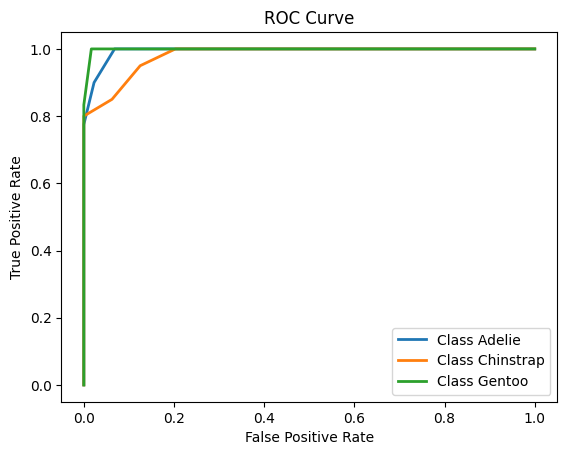

In [10]:
classes = np.unique(y_test)
y_test_binarized = label_binarize(y_test, classes=classes)

dt_probs = dt_pipeline_2.predict_proba(X_test)

# Number of classes
n_classes = len(classes)

# Compute ROC curve for each class
for i in range(n_classes):
    # Compute ROC for each class
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], dt_probs[:, i])

    # Code to plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()